Задание №1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [4]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


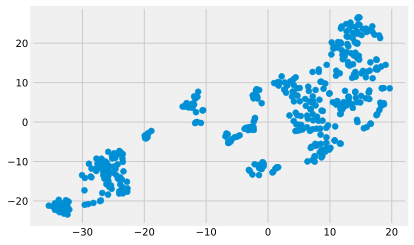

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание №2

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

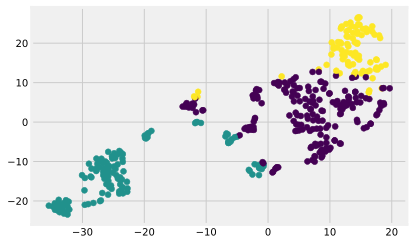

In [39]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [40]:
labels_test = kmeans.predict(X_train_scaled)

In [63]:
labels_test==labels_train #Не ясно почему они между собой равны?

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


In [42]:
print('CRIM - Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('CRIM - Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('CRIM - Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


CRIM - Кластер 0: 0.42166020942408367
CRIM - Кластер 1: 10.797028425196853
CRIM - Кластер 2: 0.07356558139534886


In [43]:
y_train.mean()

22.796534653465343

In [44]:
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0: 24.958115183246072
Кластер 1: 16.165354330708663
Кластер 2: 27.78837209302326


Задание №3

In [45]:
kmeans = KMeans(n_clusters=3)

labels_train_1 = kmeans.fit_predict(X_test_scaled)
labels_test_1 = kmeans.predict(X_test_scaled)

# plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

# plt.show()

In [47]:
print('CRIM - Кластер 0: {}'.format(X_test.loc[labels_train_1 == 0, 'CRIM'].mean()))
print('CRIM - Кластер 1: {}'.format(X_test.loc[labels_train_1 == 1, 'CRIM'].mean()))
print('CRIM - Кластер 2: {}'.format(X_test.loc[labels_train_1 == 2, 'CRIM'].mean()))


CRIM - Кластер 0: 0.04070333333333334
CRIM - Кластер 1: 9.419181842105264
CRIM - Кластер 2: 0.21929690909090907


In [62]:
print('Кластер 0: {}'.format(y_test[labels_train_1 == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_train_1 == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_train_1 == 2].mean()))

Кластер 0: 34.3111111111111
Кластер 1: 16.710526315789473
Кластер 2: 22.690909090909095


In [54]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

X_test_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


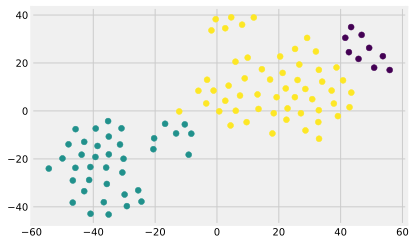

In [60]:
kmeans = KMeans(n_clusters=3)

#labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train_1)

plt.show()